## Health insurance cost prediction system

#### Project Team Members
#### Yenduri Gaurav sai nitin
#### Nathi Sri Laxmi

#### 1. Importing required packges for the data processing

In [43]:
# Importing required modules
import pandas as pd
import numpy as np
import seaborn as sns

#### 2. Load the dataset

In [44]:
# Load dataset
data = pd.read_csv("insurance.csv")

#### 3. Analyze the data by displaying the sample rows to know how the data looks like, what are the data types.

In [45]:
# Displays top 5 rows of the database
data.head(5)

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [46]:
# Displays top 5 rows of the database
data.tail(5)

,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


In [47]:
#Displays the number of rows and columns of the dataset
data.shape

(1338, 7)

In [48]:
#Prints number of rows and columns
print("number of rows",data.shape[0])
print("number of columns",data.shape[1])

number of rows 1338
number of columns 7


In [49]:
# Get Information About Our Dataset Like Total Number Rows, Total Number of Columns, Datatypes of Each Column And Memory Requirement
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


#### 4. Check if there are any null values in the dataset and statistical display of the data

In [50]:
# Check Null Values In The Dataset
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [51]:
#Displays overall statistics of the dataset
data.describe(include='all')

,age,sex,bmi,children,smoker,region,expenses
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.665471,1.094918,NaN,NaN,13270.422414
std,14.049960,NaN,6.098382,1.205493,NaN,NaN,12110.011240
min,18.000000,NaN,16.000000,0.000000,NaN,NaN,1121.870000
25%,27.000000,NaN,26.300000,0.000000,NaN,NaN,4740.287500
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.030000
75%,51.000000,NaN,34.700000,2.000000,NaN,NaN,16639.915000


In [52]:
# Display the sample 5 records from top
data.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


#### 5. Encode String variable values with numerical values

In [53]:
#Encode Sex, Smoker, and Region values with numeric values.
data['sex'] = data['sex'].map({'female':1,'male':0})
data['smoker'] = data['smoker'].map({'yes':1,'no':0})
data['region']=data['region'].map({'southwest':1,'southeast':2, 'northwest':3,'northeast':4})

In [54]:
# Display the sample values
data.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,1,27.9,0,1,1,16884.92
1,18,0,33.8,1,0,2,1725.55
2,28,0,33.0,3,0,2,4449.46
3,33,0,22.7,0,0,3,21984.47
4,32,0,28.9,0,0,3,3866.86


In [55]:
# Display the attributes with data type
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   int64  
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 73.3 KB


In [56]:
# Display the columns of the dataset 'data'
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses'], dtype='object')

#### 6. Group the dataset for data analysis and easy representation

In [57]:
# Creating age group intervals and adding a new variable 'AgeGroup' to the dataset
bins = pd.IntervalIndex.from_tuples([(0, 10), (10, 20), (20, 30), (30, 40), (40, 50), (50, 60), (60, 70), (70, 80), (80, 90), (90, 100)])
# pandas.cut https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.cut.html
labels = ['0-9','10-19','20-29','30-39','40-49', '50-59', '60-69', '70-79', '80-89', '90-100']

data['AgeGroup'] = pd.cut(data['age'], bins=bins, labels=labels, right=False)
#X_train_data['AgeGroup'] = X_train_data['AgeGroup'].cat.add_categories('unknown')
#                                                   .fillna('unknown')
data.sample(6)

,age,sex,bmi,children,smoker,region,expenses,AgeGroup
1046,43,1,25.1,0,0,4,7325.05,"(40, 50]"
713,20,0,40.5,0,0,4,1984.45,"(10, 20]"
1223,20,1,24.4,0,1,2,26125.67,"(10, 20]"
906,27,0,32.6,3,0,4,4846.92,"(20, 30]"
787,21,0,36.9,0,0,3,1917.32,"(20, 30]"
833,58,0,34.4,0,0,3,11743.93,"(50, 60]"


In [58]:
# aggregating the dataset values using mean operation 
df_agegroup = data.groupby('AgeGroup').mean()
df_agegroup

,age,sex,bmi,children,smoker,region,expenses
AgeGroup,,,,,,,
"(0, 10]",NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(10, 20]",18.759036,0.481928,30.089759,0.512048,0.234940,2.469880,8713.482771
"(20, 30]",25.471223,0.482014,29.775180,1.035971,0.201439,2.496403,9806.025432
"(30, 40]",35.470817,0.494163,30.399611,1.505837,0.210117,2.490272,11639.308716
"(40, 50]",45.572954,0.498221,30.810676,1.387900,0.217082,2.473310,14782.043132
"(50, 60]",55.305660,0.505660,31.451698,0.962264,0.158491,2.490566,17062.293019
"(60, 70]",62.483516,0.516484,32.448352,0.659341,0.241758,2.472527,21063.163407
"(70, 80]",NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(80, 90]",NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### 6. Analysing the data to find the relationship among the attributes of the dataset

Text(0, 0.5, 'Expenses ($)')

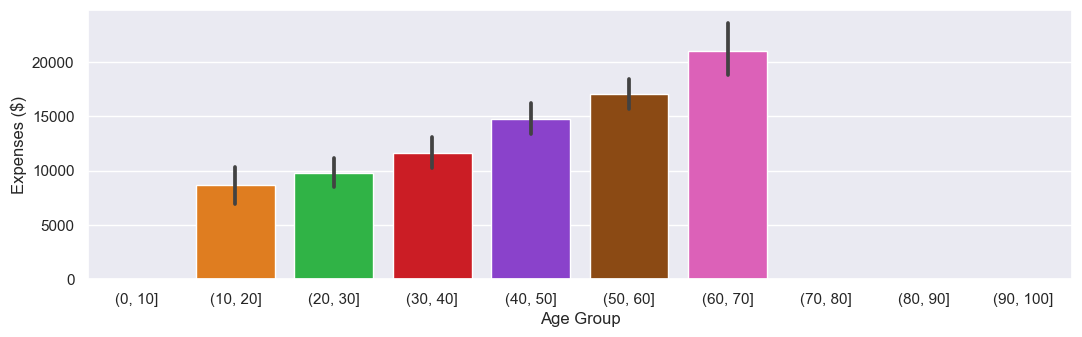

In [59]:
# Displaying the relationship between the variables 'AgeGroup' and 'expenses' 
sns.set(rc={'figure.figsize':(12.7,3.5)})
plot = sns.barplot(x='AgeGroup', y='expenses', data=data, palette='bright');
plot.set_xlabel("Age Group")
plot.set_ylabel("Expenses ($)")

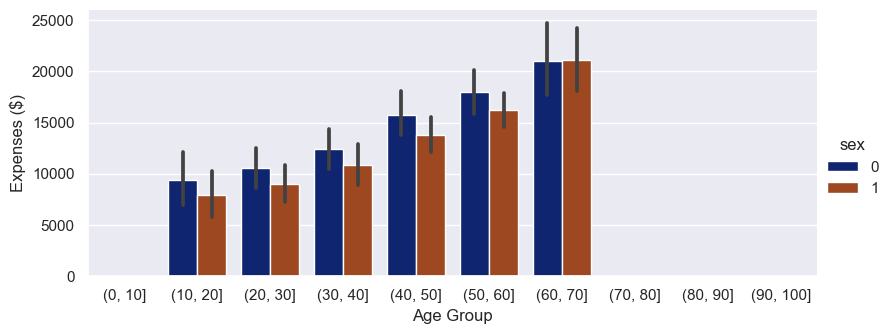

In [60]:
# Displaying the relationship between the variables 'AgeGroup', 'Sex', and 'expenses'
sns.set(rc={'figure.figsize':(12.7,3.5)})
plot = sns.catplot(x='AgeGroup', y='expenses', hue='sex', data=data, kind='bar', palette='dark', height=3.5, aspect=2.4)
plot.set( xlabel = "Age Group", ylabel = "Expenses ($)")


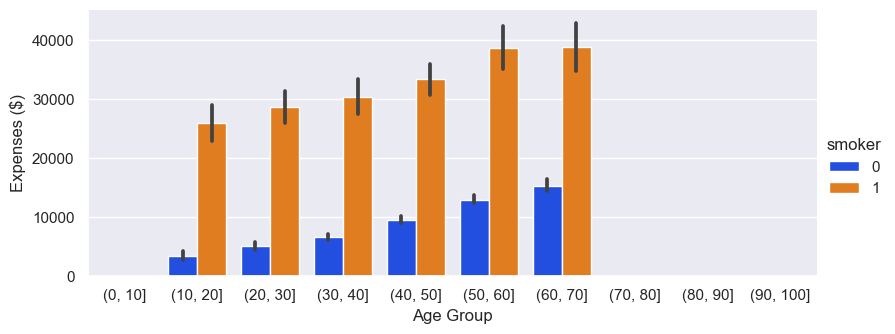

In [61]:
# Displaying the relationship between the variables 'AgeGroup', 'smoker', and 'expenses'
sns.set(rc={'figure.figsize':(12.7,3.5)})
plot = sns.catplot(x='AgeGroup', y='expenses', hue='smoker', data=data, kind='bar', palette='bright', height=3.5, aspect=2.4)
plot.set( xlabel = "Age Group", ylabel = "Expenses ($)")

[Text(0.5, 0, 'BMI'), Text(0, 0.5, 'Expenses ($)')]

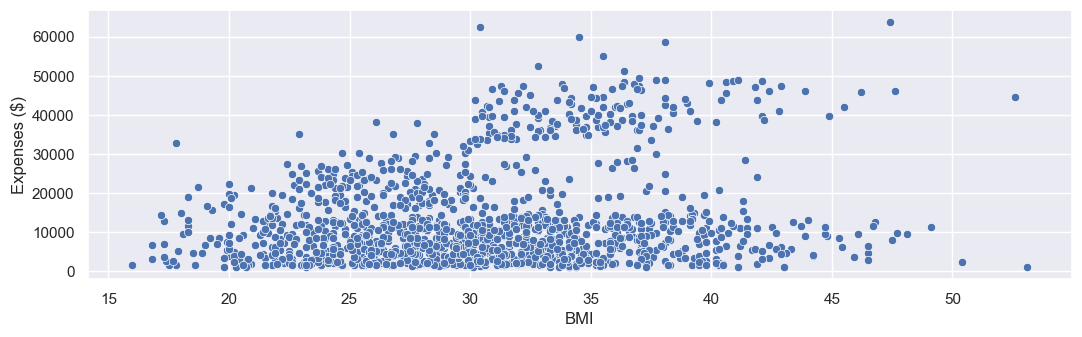

In [62]:
# Displaying the relationship between the variables 'bmi', and 'expenses'
sns.set(rc={'figure.figsize':(12.7,3.5)})
plot = sns.scatterplot(x='bmi', y='expenses', data=data);
plot.set( xlabel = "BMI", ylabel = "Expenses ($)")

#### 7. Splitting the dataset into two parts for training and testing purpose

In [63]:
# Store Feature Matrix In X and Response(Target) In Vector y
X = data.drop(['expenses','AgeGroup'],axis=1)
Y = data['expenses']

In [64]:
# Split data into two part : a training set and a testing set
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [65]:
# printing sizes of all the dataset parts
print('Size of X_train : ', X_train.shape)
print('Size of Y_train : ', Y_train.shape)
print('Size of X_test : ', X_test.shape)
print('Size of Y_test : ', Y_test.shape)

Size of X_train :  (1070, 6)
Size of Y_train :  (1070,)
Size of X_test :  (268, 6)
Size of Y_test :  (268,)


#### 8. Importing the required packegs for machine learning models

In [66]:
# Importing modules required for training
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

ModuleNotFoundError: No module named 'xgboost'

#### 9. Training Linear, Ridge, Support vector, Gradient boosting and Decision tree Regression models

In [192]:
# Model training 

# Linear Regression
lr = LinearRegression()
lr.fit(X_train,Y_train)

# Ridge Regression
rd = Ridge()
rd.fit(X_train,Y_train)

# Random Forest Regression
rf = RandomForestRegressor()
rf.fit(X_train,Y_train)

# Gradient Boosting Regression
gr = GradientBoostingRegressor()
gr.fit(X_train,Y_train)

# Decision Tree Regression
dtr = DecisionTreeRegressor()
dtr.fit(X_train,Y_train)

# XG boost Regression
xgb = XGBRegressor()
xgb.fit(X_train,Y_train)

# Polynomial Regression
plr = make_pipeline(PolynomialFeatures(2),StandardScaler(),LinearRegression())
plr.fit(X_train,Y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

#### 10. Predicting the Insurance expenses using the trained models

In [193]:
# Prediction on Test Data
Y_lr_pred = lr.predict(X_test)
Y_rd_pred = rd.predict(X_test)
Y_rf_pred = rf.predict(X_test)
Y_gr_pred = gr.predict(X_test)
Y_dtr_pred = dtr.predict(X_test)
Y_xgb_pred = xgb.predict(X_test)
Y_plr_pred = plr.predict(X_test)

df = pd.DataFrame({'Actual':Y_test,'LR':Y_lr_pred,'RD':Y_rd_pred,'RF':Y_rf_pred,'GR':Y_gr_pred,'DTR':Y_dtr_pred, 'XGB':Y_xgb_pred, 'PLR':Y_plr_pred})

In [194]:
# Displaying the new dataset created using the predicted values
df

,Actual,LR,RD,RF,GR,DTR,XGB,PLR
764,9095.07,8931.642854,8955.023266,10952.6046,11124.290442,7419.48,9031.370117,11186.479899
887,5272.18,7108.658375,7132.854248,5129.6845,5849.725392,5469.01,9217.743164,6573.623090
890,29330.98,36911.245886,36794.070339,28012.4711,27971.805338,28950.47,28418.814453,34066.548227
1293,9301.89,9492.186731,9523.364568,10386.7044,9818.573769,9282.48,9519.307617,10335.653198
259,33750.29,27005.514588,26905.348988,34320.6270,34027.954616,34303.17,33617.339844,29403.752640
...,...,...,...,...,...,...,...,...
109,47055.53,39118.983220,39009.675661,47495.8641,45440.971791,46599.11,43084.714844,46886.141967
575,12222.90,11822.870656,11842.528564,12174.5655,12800.964047,11073.18,9787.582031,13025.351869
535,6067.13,7628.837051,7660.977281,6402.2967,6863.005649,6555.07,5839.548828,7802.395798
543,63770.43,40956.397727,40841.370305,46707.5435,47951.920861,47269.85,45489.734375,58073.473920


#### 11. Importing the packages required for graphical representation 

In [195]:
# Importing packages for graphs
import matplotlib.pyplot as plt
from sklearn import metrics

#### 12. Comparing the model performances graphically

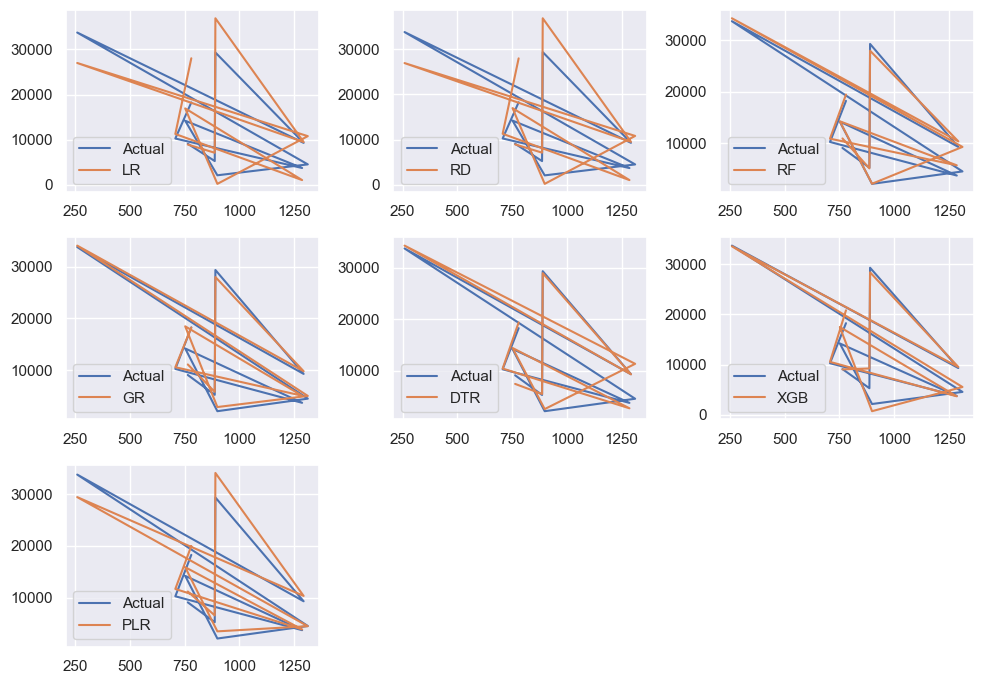

In [196]:
# Compare Performance Visually
fig, ax = plt.subplots(figsize=(10,7))
fig.tight_layout()
ax.remove()
plt.subplot(331)
plt.plot(df['Actual'].iloc[0:11],label='Actual')
plt.plot(df['LR'].iloc[0:11],label="LR")
plt.legend()

plt.subplot(332)
plt.plot(df['Actual'].iloc[0:11],label='Actual')
plt.plot(df['RD'].iloc[0:11],label="RD")
plt.legend()

plt.subplot(333)
plt.plot(df['Actual'].iloc[0:11],label='Actual')
plt.plot(df['RF'].iloc[0:11],label="RF")
plt.legend()

plt.subplot(334)
plt.plot(df['Actual'].iloc[0:11],label='Actual')
plt.plot(df['GR'].iloc[0:11],label="GR")
plt.legend()

plt.subplot(335)
plt.plot(df['Actual'].iloc[0:11],label='Actual')
plt.plot(df['DTR'].iloc[0:11],label="DTR")
plt.legend()

plt.subplot(336)
plt.plot(df['Actual'].iloc[0:11],label='Actual')
plt.plot(df['XGB'].iloc[0:11],label="XGB")
plt.legend()

plt.subplot(337)
plt.plot(df['Actual'].iloc[0:11],label='Actual')
plt.plot(df['PLR'].iloc[0:11],label="PLR")
plt.legend()

plt.tight_layout()

#### 13. Calculating r squared, mean absolute error and meansquared error values for all the machine learning models

In [42]:
# Evaluationg the algorithms
# Calculating r squared value
r2_lr = metrics.r2_score(Y_test,Y_lr_pred)
r2_rd = metrics.r2_score(Y_test,Y_rd_pred)
r2_svr = metrics.r2_score(Y_test,Y_svr_pred)
r2_rf = metrics.r2_score(Y_test,Y_rf_pred)
r2_gr = metrics.r2_score(Y_test,Y_gr_pred)
r2_dtr = metrics.r2_score(Y_test,Y_dtr_pred)
r2_xgb = metrics.r2_score(Y_test,Y_xgb_pred)
r2_plr = metrics.r2_score(Y_test,Y_plr_pred)

NameError: name 'metrics' is not defined

In [198]:
# Prting all r squared values
print(r2_lr,r2_rd,r2_rf,r2_gr,r2_dtr, r2_xgb, r2_plr)

0.7833214205203848 0.7830603526059121 0.8662968849206341 0.8753180964375191 0.7258520932968437 0.8421152736583577 0.8678040813018272


In [199]:
# Calculating the mean absolute error values
mae_lr = metrics.mean_absolute_error(Y_test,Y_lr_pred)
mae_rd = metrics.mean_absolute_error(Y_test,Y_rd_pred)
mae_rf = metrics.mean_absolute_error(Y_test,Y_rf_pred)
mae_gr = metrics.mean_absolute_error(Y_test,Y_gr_pred)
mae_dtr = metrics.mean_absolute_error(Y_test,Y_dtr_pred)
mae_xgb = metrics.mean_absolute_error(Y_test,Y_xgb_pred)
mae_plr = metrics.mean_absolute_error(Y_test,Y_plr_pred)

In [200]:
# Prting all mean absolute error values
print(mae_lr,mae_rd,mae_rf,mae_gr,mae_dtr,mae_xgb,mae_plr)

4186.940106317012 4198.53120409237 2471.6673340671637 2503.8015560702656 3037.2150746268658 2880.9371783492816 2730.7504784520247


In [201]:
# Calculating the mean squared error values
rmse_lr = (np.sqrt(metrics.mean_squared_error(Y_test, Y_lr_pred)))
rmse_rd = (np.sqrt(metrics.mean_squared_error(Y_test, Y_rd_pred)))
rmse_rf = (np.sqrt(metrics.mean_squared_error(Y_test, Y_rf_pred)))
rmse_gr = (np.sqrt(metrics.mean_squared_error(Y_test, Y_gr_pred)))
rmse_dtr = (np.sqrt(metrics.mean_squared_error(Y_test, Y_dtr_pred)))
rmse_xgb = (np.sqrt(metrics.mean_squared_error(Y_test, Y_xgb_pred)))
rmse_plr = (np.sqrt(metrics.mean_squared_error(Y_test, Y_plr_pred)))

In [202]:
# Printing the mean squared error values
print(rmse_lr,rmse_rd,rmse_rf,rmse_gr,rmse_dtr,rmse_xgb,rmse_plr)

5799.920265829355 5803.413267476021 4556.011337938985 4399.625853041213 6523.888056180618 4950.899296024496 4530.259262092006


#### 14. Comparing all the models evaluation value results 

In [203]:
# Creating a array data with all evaluation metric results
models = [('Linear Regression', r2_lr, mae_lr, rmse_lr),
          ('Ridge Regression', r2_rd, mae_rd, rmse_rd),
          ('Random Forest Regression', r2_rf, mae_rf, rmse_rf),
          ('Gradient Boosting Regression', r2_gr, mae_gr, rmse_gr),
          ('Decision Tree Regression', r2_dtr, mae_dtr, rmse_dtr),
          ('Extreme Gradient Boost Regression', r2_xgb, mae_xgb, rmse_xgb),
          ('Polynomial Regression', r2_plr, mae_plr, rmse_plr)
         ]

In [204]:
# Creating a data frame using the models array data 
predict = pd.DataFrame(data = models, columns=['Model', 'R Squared', 'Mean Absolute Error', 'Mean Squared Error'])
predict

,Model,R Squared,Mean Absolute Error,Mean Squared Error
0,Linear Regression,0.783321,4186.940106,5799.920266
1,Ridge Regression,0.783060,4198.531204,5803.413267
2,Random Forest Regression,0.866297,2471.667334,4556.011338
3,Gradient Boosting Regression,0.875318,2503.801556,4399.625853
4,Decision Tree Regression,0.725852,3037.215075,6523.888056
5,Extreme Gradient Boost Regression,0.842115,2880.937178,4950.899296
6,Polynomial Regression,0.867804,2730.750478,4530.259262


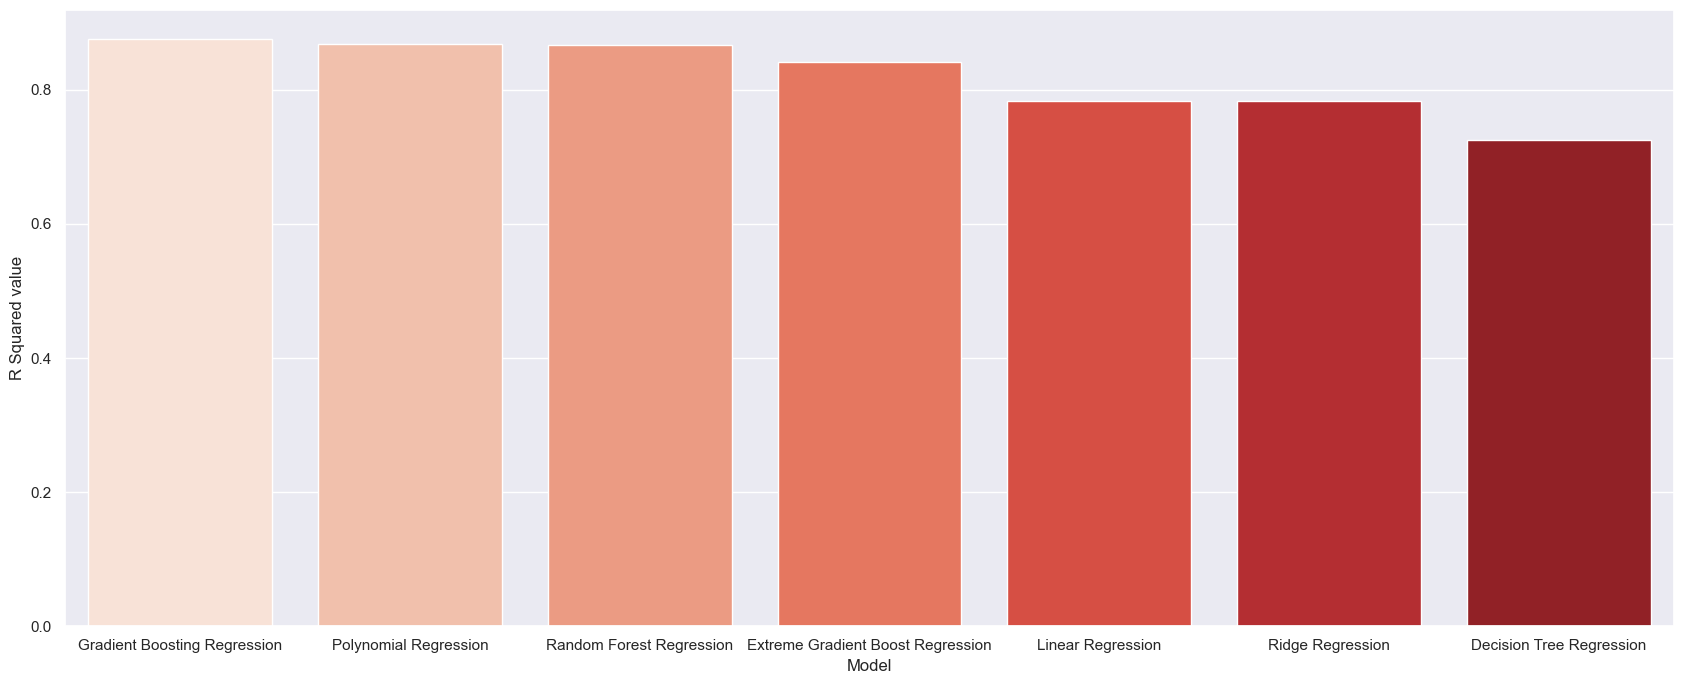

In [205]:
# Comparing the models R squared values graphically
plt.figure(figsize=(17,7))
predict.sort_values(by=['R Squared'], ascending=False, inplace=True)
sns.barplot(x='Model', y='R Squared',data = predict, palette='Reds')
plt.xlabel('Model')
plt.ylabel('R Squared value')
plt.tight_layout()
plt.show()

#### 15. Predicting the Insurance expenses for a new person using gradient boosting model

In [206]:
# Assigning the data values for testing
data = {'age' : 40,
        'sex' : 1,
        'bmi' : 40.30,
        'children' : 4,
        'smoker' : 1,
        'region' : 2}

df_test = pd.DataFrame(data,index=[0])
df_test

,age,sex,bmi,children,smoker,region
0,40,1,40.3,4,1,2


In [207]:
# Predicting the insurance expenses using the gradient boosting model
new_pred = gr.predict(df_test)
print("Medical Insurance cost for new : ",new_pred)

Medical Insurance cost for new :  [42833.61010846]


#### 16. Training the model with entire dataset before the deployment

In [208]:
# Training our Gradient boost method using extire dataset
gr = GradientBoostingRegressor()
gr.fit(X,Y)

GradientBoostingRegressor()

#### 17. Building the model using joblib and predicting the Insurance expenses

In [209]:
# Importing joblib package for building the model
import joblib

In [210]:
# Building the model
joblib.dump(gr,'model_gr')
model = joblib.load('model_gr')

In [211]:
# Predicting the insurance expenses using the model
model.predict(df_test)

array([42055.84785873])

#### 18. Creating the User Interface for predicting the Insurance expenses.

In [99]:
# Importing the package required for UI
import tkinter as tk

In [100]:
root = tk.Tk()
canvas1 = tk.Canvas(root, width=500, height=400,highlightbackground="teal",highlightthickness=3,bg='#FFFFFF')
canvas1.pack()

In [101]:
# Creating labels and input box for attributes
label1 = tk.Label(root, text='Age : ', bg='#FEFFFF')
canvas1.create_window(120, 100, window=label1)

entry1 = tk.Entry(root)  # create 1st entry box
canvas1.create_window(270, 100, window=entry1)


label2 = tk.Label(root, text=' Gender: ', bg='#FEFFFF')
canvas1.create_window(120, 130, window=label2)

3

In [102]:
# Creating radio buttons for SEX attribute
sexvar=tk.StringVar()
entry2 = tk.Radiobutton(root,text='Male',variable=sexvar,padx=20,value=0, bg='#FEFFFF').place(x=200,y=120)
entry21 = tk.Radiobutton(root,text='Female',variable=sexvar,padx=20,value=1, bg='#FEFFFF').place(x=300,y=120)
sexvar.set('Male') 

In [103]:
# Creating labels and input box for attributes
label3 = tk.Label(root, text=' BMI: ', bg='#FEFFFF')
canvas1.create_window(120, 160, window=label3)

entry3 = tk.Entry(root)  # create 2nd entry box
canvas1.create_window(270, 160, window=entry3)

label4 = tk.Label(root, text=' Children: ', bg='#FEFFFF')
canvas1.create_window(120, 190, window=label4)

entry4 = tk.Entry(root)  # create 2nd entry box
canvas1.create_window(270, 190, window=entry4)

label5 = tk.Label(root, text=' Smoker: ', bg='#FEFFFF')
canvas1.create_window(120, 220, window=label5)

smokervar=tk.StringVar()
entry5 = tk.Radiobutton(root,text='Smoker',variable=smokervar,padx=20,value=1, bg='#FEFFFF').place(x=200,y=210)
entry51 = tk.Radiobutton(root,text='Non Smoker',variable=smokervar,padx=20,value=0, bg='#FEFFFF').place(x=300,y=210)
smokervar.set('Smoker')

In [104]:
label6 = tk.Label(root, text=' Region: ', bg='#FEFFFF')
canvas1.create_window(120, 250, window=label6)

9

In [105]:
#entry6 = tk.Entry(root)  # create 2nd entry box
regionvar=tk.StringVar()
entry6 = tk.Radiobutton(root,text='SouthWest',variable=regionvar,padx=20,value=1, bg='#FEFFFF').place(x=200,y=240)
entry61 = tk.Radiobutton(root,text='SouthEast',variable=regionvar,padx=20,value=2, bg='#FEFFFF').place(x=200,y=260)
entry62 = tk.Radiobutton(root,text='NorthWest',variable=regionvar,padx=20,value=3, bg='#FEFFFF').place(x=200,y=280)
entry63 = tk.Radiobutton(root,text='NorthEast',variable=regionvar,padx=20,value=4, bg='#FEFFFF').place(x=200,y=300)
regionvar.set('SouthEast')
#canvas1.create_window(270, 220, window=entry6)


In [ ]:
# creating functions to submit the values for calculation of Insurance Expenses.
def values():
    
    global age_value  # our 1st input variable
    age_value = float(entry1.get())
    
    global sex_value  # our 1st input variable
    sex_value = float(sexvar.get())
        
    global bmi_value  # our 3rd input variable
    bmi_value = float(entry3.get())
    
    global children_value  # our 4th input variable
    children_value = float(entry4.get())
    
    global smoker_value  # our 4th input variable
    smoker_value = float(smokervar.get())
    
    global region_value  # our 4th input variabl
    region_value = float(regionvar.get())    
        
    model = joblib.load('model_gr')
    result = model.predict([[age_value,sex_value,bmi_value,children_value,smoker_value,region_value]])
    #print([age_value,sex_value,bmi_value,children_value,smoker_value,region_value])

    Prediction_result = 'Predicted Insurance Cost: '+str(result)
    label_Prediction = tk.Label(root, text=Prediction_result,font = "Helvetica 9 bold", bg='teal')
    canvas1.create_window(320, 350, window=label_Prediction)
    
button1 = tk.Button(root, text='Predict Insurance Cost', command=values,
                    bg='teal')  # button to call the 'values' command above
canvas1.create_window(100, 350, window=button1)
label_main = tk.Label(root,text="Insurance Cost Prediction Tool",font = "Helvetica 16 bold",bg='teal')
canvas1.create_window(250,35,window=label_main)

root.mainloop()